In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

%matplotlib inline

# 2D-DFT
## Question 1
### Iterative implementation

In [2]:
def dft_1(I):
    (M, N) = I.shape
    W_M = np.exp(-1*1j*2*np.pi/M)
    W_N = np.exp(-1*1j*2*np.pi/N)
    It = np.zeros((M, N))
    
    for u in range(M):
        for v in range(N):
            for i in range(M):
                for j in range(N):
                    It[u, v] = I[i, j]*np.power(W_M, i)*np.power(W_N, j)
    
    return It

def idft_1(It):
    (M, N) = It.shape
    W_M = np.exp(-1*1j*2*np.pi/M)
    W_N = np.exp(-1*1j*2*np.pi/N)
    I = np.zeros((M, N))
    
    for u in range(M):
        for v in range(N):
            for i in range(M):
                for j in range(N):
                    I[u, v] = It[i, j]*np.power(W_M, -1*i)*np.power(W_N, -1*j)
    
    return (1/(M*N))*I

def plot_DFT(It, log=True):
    mag = np.absolute(It)
    phase = np.angle(It)
    
    plt.figure()
    
    plt.subplot(1, 2, 1)
    plt.title("Magnitude")
    if log:
        plt.imshow(np.log(1 + mag), cmap='gray')
    else:
        plt.imshow(mag, cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title("Phase")
    plt.imshow(phase, cmap='gray')

In [3]:
import cv2

img = cv2.imread("clock.tiff", cv2.IMREAD_GRAYSCALE)

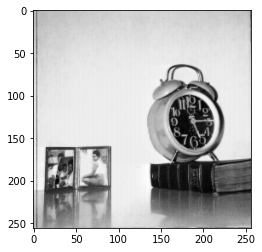

In [4]:
plt.imshow(img, cmap='gray')

In [5]:
I_dft = dft_1(img)
plot_DFT(I_dft)

<ipython-input-2-803c538f9da1>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  It[u, v] = I[i, j]*np.power(W_M, i)*np.power(W_N, j)


KeyboardInterrupt: 

### Matrix implementation

In [5]:
def dft_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp( - 2 * np.pi * 1j / N )
    W = np.power( omega, i * j )
    return W

def idft_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp(2 * np.pi * 1j / N )
    W = np.power( omega, i * j ) / N
    return W

def dft_2(I):
    (M, N) = I.shape
    
    W_N = dft_matrix(N)
    W_M = dft_matrix(M)
    
    It = np.zeros((M, N), dtype=np.complex)
    It = W_M@I@W_N
    return It

def idft_2(It):
    (M, N) = It.shape
    W_N = idft_matrix(N)
    W_M = idft_matrix(M)
    
    I = np.zeros((M, N), dtype=int)
    I = np.clip(np.real(W_M@It@W_N), 0, 255)
    return I

### DFT on image

<ipython-input-5-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


CPU times: user 359 ms, sys: 275 ms, total: 634 ms
Wall time: 128 ms


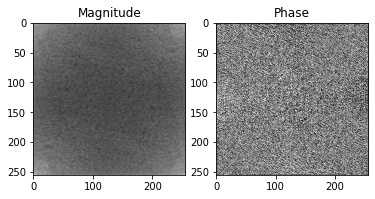

In [6]:
%%time
I_dft = dft_2(img)
plot_DFT(I_dft)

CPU times: user 212 ms, sys: 122 ms, total: 334 ms
Wall time: 85.9 ms


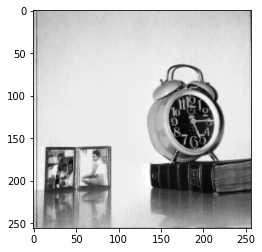

In [7]:
%%time
I = idft_2(I_dft)
plt.imshow(I, cmap='gray')

### Centered DFT

In [8]:
def centered_dft(I):
    (M, N) = I.shape
    i, j = np.meshgrid(np.arange(M), np.arange(N))
    scale_mat = np.power(-1, i + j)
    
    return dft_2(scale_mat*I)

<ipython-input-5-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


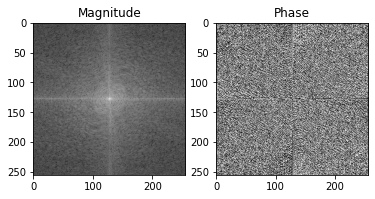

In [9]:
c_I_dft = centered_dft(img)
plot_DFT(c_I_dft)

### IDFT[DFT[I]] = I

In [10]:
I = idft_2(dft_2(img))

<ipython-input-5-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


In [11]:
if np.allclose(I, img):
    print("IDFT[DFT[I]] == I is verified!!")
else:
    print("IDFT[DFT[I]] == I is not verified!!")

IDFT[DFT[I]] == I is verified!!


### Importance of Phase
#### (a) Setting the phase to 0

In [12]:
I_dft_ph_zero = np.real(I_dft)
I_ph_zero = idft_2(I_dft_ph_zero)

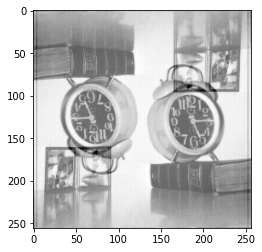

In [13]:
plt.imshow(I_ph_zero, cmap='gray')

#### (b) Adding noise

In [14]:
I_dft_mag = np.absolute(I_dft)
I_dft_phase = np.angle(I_dft)
I_dft_phase_noise = np.random.normal(size=I.shape) + I_dft_phase

I_phase_noise = idft_2(I_dft_mag * np.exp(1j * I_dft_phase_noise)) 

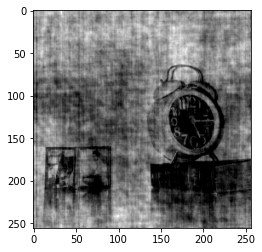

In [15]:
plt.imshow(I_phase_noise, cmap='gray')

# Periodic Convolution

In [16]:
def circular_convolve(f, h):
    (M, N) = f.shape
    (m, n) = h.shape
    
    fr = np.flip(f)
    F = np.vstack((np.hstack((fr, fr)), np.hstack((fr, fr))))
#     plt.figure()
#     plt.imshow(F, cmap='gray')
#     plt.figure()
#     plt.imshow(h, cmap='gray')
    J = np.zeros((M, N))
    for i in range(M):
        for j in range(N):
            J[i, j] = np.sum(F[(M - 1 - i):(m + M - i-1), (N - 1 - j):(n + N - j-1)]*h)
    return J

In [17]:
%%time
average_filter = (1/25)*np.ones((5, 5))
I_avg_cconvolve = circular_convolve(img, average_filter)

CPU times: user 413 ms, sys: 6.83 ms, total: 420 ms
Wall time: 418 ms


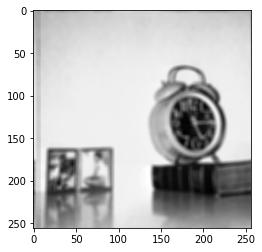

In [18]:
plt.imshow(I_avg_cconvolve, cmap='gray')

### Linear convolution with circular convolution

In [19]:
def linear_convolve(f, h):
    (M, N) = f.shape
    (m, n) = h.shape
    
    h_padded = np.vstack((np.hstack((h, np.zeros((m, 2*N - n)))), np.zeros((2*M-m, 2*N))))
    f_padded = np.vstack((np.hstack((f, np.zeros((M, N)))), np.zeros((M, 2*N))))
    return circular_convolve(f_padded, h_padded)[:M, :N]

In [20]:
%%time
I_avg_lconvolve = linear_convolve(img, average_filter)

CPU times: user 2min 42s, sys: 327 ms, total: 2min 42s
Wall time: 2min 42s


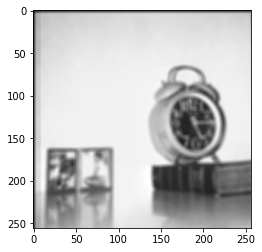

In [21]:
plt.imshow(I_avg_lconvolve, cmap='gray')

### Linear convolution with DFT

In [22]:
def linear_convolve_dft(f, h):
    (M, N) = f.shape
    (m, n) = h.shape
    
    h_padded = np.vstack((np.hstack((h, np.zeros((m, 2*N - n)))), np.zeros((2*M-m, 2*N))))
    f_padded = np.vstack((np.hstack((f, np.zeros((M, N)))), np.zeros((M, 2*N))))
    return idft_2(dft_2(h_padded) * dft_2(f_padded))[:M, :N]

In [23]:
%%time
I_avg_lconvolve_dft = linear_convolve_dft(img, average_filter)

<ipython-input-5-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


CPU times: user 2.02 s, sys: 1.11 s, total: 3.12 s
Wall time: 645 ms


In [24]:
if np.allclose(I_avg_lconvolve, I_avg_lconvolve_dft):
    print("Verification of linear convolution with DFT is successfull!!")
else:
    print("Verification of linear convolution  with DFT failed!!")

Verification of linear convolution with DFT is successfull!!


# Image denoising using linear filters

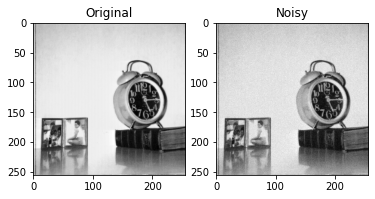

In [25]:
mu = 0
var = 25
I_noise = img + np.sqrt(var)*np.random.randn(img.shape[0], img.shape[1]) + mu

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Noisy")
plt.imshow(I_noise, cmap='gray')

## Question 1

In [26]:
def Average_filter(M):
    return (1/(M*M))*np.ones((M, M))

def rms_error(I_original, I_noisy):
    (M, N) = I_original.shape
    error = np.power(I_original - I_noisy, 2)
    return np.sqrt(np.sum(error)/(M*N))

<ipython-input-5-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


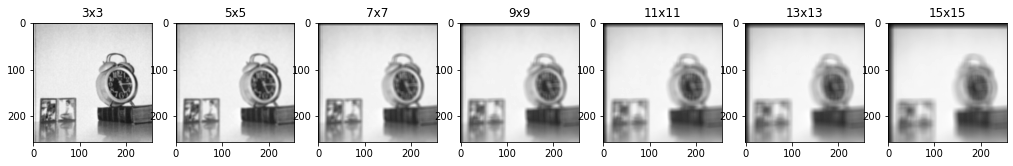

In [27]:
plt.rcParams["figure.figsize"] = (20,10)
errors = []
j = 1
for i in range(3, 17, 2):
    h = Average_filter(i)
    I_denoise = linear_convolve_dft(I_noise, h)
    errors.append(rms_error(img, I_denoise))
    plt.subplot(1, 8, j)
    plt.title("{}x{}".format(i, i))
    plt.imshow(I_denoise, cmap='gray')
    j+=1

Text(0, 0.5, 'RMS error')

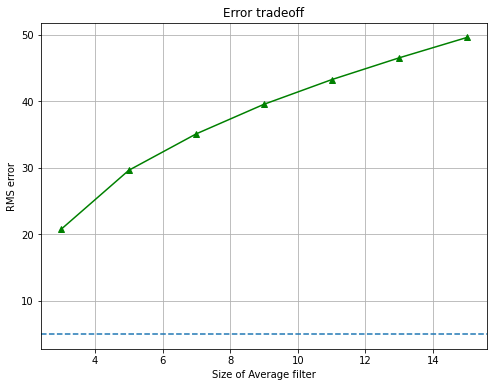

In [28]:
plt.rcParams["figure.figsize"] = (8,6)
plt.figure()
plt.title("Error tradeoff")
plt.plot(np.arange(3, 17, 2), errors, "-^g")
plt.axhline(y=rms_error(img, I_noise), linestyle='--')
plt.grid()
plt.xlabel("Size of Average filter")
plt.ylabel("RMS error")

## Question 2

In [55]:
def gaussian_filter(sigma, N):
    H = np.zeros((N, N))
    mid = N//2
    for i in range(N):
        for j in range(N):
            if(i <= mid):
                if(j <= mid):
                    H[i, j] = np.exp(-2*np.power(np.pi*sigma, 2)*(i**2 + j**2)/(N**2))
                else:
                    H[i, j] = np.exp(-2*np.power(np.pi*sigma, 2)*(i**2 + (N-1-j)**2)/(N**2))
            else:
                if(j <= mid):
                    H[i, j] = np.exp(-2*np.power(np.pi*sigma, 2)*((N-1-i)**2 + j**2)/(N**2))
                else:
                    H[i, j] = np.exp(-2*np.power(np.pi*sigma, 2)*((N-1-i)**2 + (N-1-j)**2)/(N**2))
                
#     plt.imshow(H, cmap='gray')
    return H

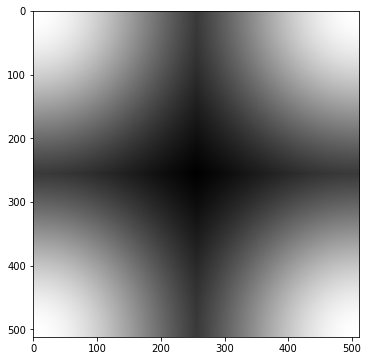

In [71]:
plt.imshow(gaussian_filter(0.5, 512), cmap='gray')

<ipython-input-5-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


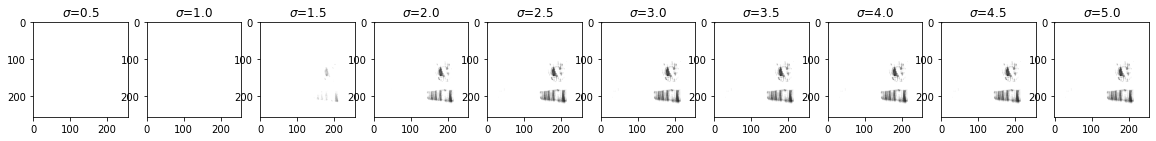

In [61]:
plt.rcParams["figure.figsize"] = (20,10)

errors_gau = []
Sigma = np.arange(0.5, 5.5, 0.5)
j = 1
for i in Sigma:
    h = gaussian_filter(i, 5)
    I_denoise = linear_convolve_dft(I_noise, h)
    errors_gau.append(rms_error(img, I_denoise))
    plt.subplot(1, 10, j)
    plt.title(r'$\sigma$={}'.format(i))
    plt.imshow(I_denoise, cmap='gray')
    j+=1

Text(0, 0.5, 'RMS error')

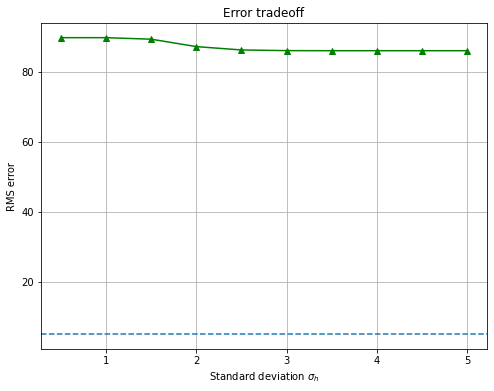

In [62]:
plt.rcParams["figure.figsize"] = (8,6)
plt.figure()
plt.title("Error tradeoff")
plt.plot(Sigma, errors_gau, "-^g")
plt.axhline(y=rms_error(img, I_noise), linestyle='--')
plt.grid()
plt.xlabel(r"Standard deviation ${\sigma}_h$")
plt.ylabel("RMS error")